# New RMS with noised sines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import gitInformation

In [2]:
gitInformation.printInformation()

Information about this notebook
Date: 2016-11-15
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dowa\Desktop\IpythonNotebook\kt-2015-DSPHandsOn\.git
Current git SHA: 8bd95795b66b6beab499b0a2c829d11705e8d7fb
Remotes: origin, 
Current branch: master
origin remote URL: https://github.com/dowa4213/kt-2015-DSPHandsOn.git


In [3]:
%matplotlib inline

### Generate a sine wave and all needed arrays 

In [4]:
# Sine wave, 16 wave numbers, 16*128 samples.  
x = np.linspace(0, 2, 16*128)
data = np.sin(16*np.pi*x)

# Different noises with different standard deviations (spread or "width") will be saved in.
diff_noise = np.zeros((140,len(data)))

# Array for noised sines. 
noised_sines = np.zeros((140,len(data)))

# Array for median filtered signals.
medfilter = np.zeros((140,len(data)))

# Array for median subtraction filtered sine waves.
filtered_sines = np.zeros((140,len(data)))

# Array for RMS of filtered signals. 
behav = np.zeros(140)

# Lists with used window lengths and standard deviation of noise.
wl = [17,33,65,97, 129, 161, 193, 225, 257, 289, 321, 353, 385, 417, 449]
sn = [0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10]

### Calculation for new RMS

In [5]:
# RMS calculation: alternative
values = np.zeros((len(wl), len(sn)))
count = -1
count2 = -1


for x in sn:
    count = count + 1
    for w in wl:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, x, len(data))
            noised_sines[i, :] = data + diff_noise[i, :]
            medfilter = medfilt(data, w)
            filtered_sines[i, :] = noised_sines[i, :] - medfilter
            behav[i] = np.sqrt(np.mean(np.square(filtered_sines[i, :])))
        mean = np.mean(behav)   
        values[count2:count2+1:,-count] = mean
    count2 = -1
np.savetxt("values2A.txt", values)

In [6]:
values2A = np.loadtxt("values2A.txt")

In [7]:
# viridis colormap for better visualisation
viridis_data = np.loadtxt("viridis_data.txt")

### Plot of RMS with different standard deviation of noise

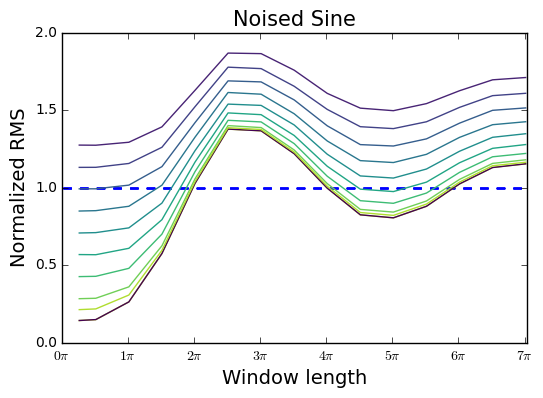

In [8]:
fig = plt.figure()
values4 = np.zeros((len(wl), len(sn)))

for i in range (11):
    # Normalize the RMS with the RMS of a normal sine wave
    values4[::,i] = values2A[::,i]/0.7069341
    ax = plt.subplot()
    plt.axis([0, 450, 0, 2])
    xticks = np.arange(0, max(wl) + 1, 64)
    ax.set_xticks(xticks)
    
    # x_label = pi at each 64th point
    x_label = [r"${%s\pi}$" % (v) for v in range(len(xticks))]
    ax.set_xticklabels(x_label)
    plt.ylabel('Normalized RMS', size = 14)
    plt.xlabel('Window length', size = 14)
    plt.title('Noised Sine', size = 15)
    plt.plot(wl,values4[::,i], color=viridis_data[(i*25)-25,:])
    plt.hlines(1,1,max(wl), color = 'b', linestyle = '--')
plt.savefig("New RMS noised Sines.png", dpi = 400)